<a href="https://colab.research.google.com/github/posili/Modulabs_MainProject5/blob/master/Project5_kgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings

# 폰트 관련 경고 메시지 숨기기
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'

In [2]:
!git clone https://github.com/posili/Modulabs_MainProject5.git

# 클론한 폴더에서 CSV 파일 불러오기
df = pd.read_csv("/content/Modulabs_MainProject5/df_products.csv")


Cloning into 'Modulabs_MainProject5'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 26 (delta 1), reused 0 (delta 0), pack-reused 20 (from 1)
Receiving objects: 100% (26/26), 8.73 MiB | 3.82 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# CSV 파일 읽기
df_train = pd.read_csv("/content/drive/My Drive/order_products__train.csv")
df_orders = pd.read_csv("/content/drive/My Drive/orders.csv")
df_prior = pd.read_csv("/content/drive/My Drive/order_products__prior.csv")

Mounted at /content/drive


In [4]:
# 데이터 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [5]:
 # 데이터 확인
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
df_prior.info()
df_prior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
df_orders['days_since_prior_order'].isna().sum()

206209

In [10]:
df_orders['days_since_prior_order'].isna().mean() * 100

6.027594185817766

In [11]:
#first_purchase라는 첫구매 확인용 컬럼 추가하여 days_since_prior_order가 NaN이면 1, 아니면 0을 저장
df_orders["first_purchase"] = df_orders["days_since_prior_order"].isna().astype(int)

#평균과 중앙값 확인
df_orders["days_since_prior_order"].describe().apply(lambda x: f"{x:,.2f}")

,days_since_prior_order
count,"3,214,874.00"
mean,11.11
std,9.21
min,0.00
25%,4.00
50%,7.00
75%,15.00
max,30.00


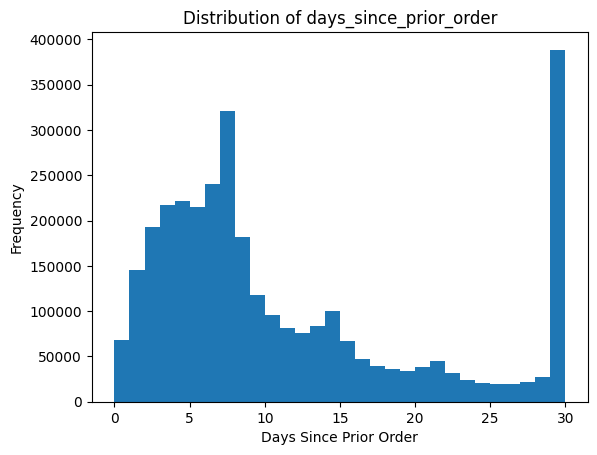

In [12]:
# 데이터 분포 확인
plt.hist(df_orders["days_since_prior_order"].dropna(), bins=30)
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.title("Distribution of days_since_prior_order")
plt.show()

0~10일 사이에 주문이 많은 패턴.  
**30일(맨 끝 값)**에 빈도 급증 → 한 달 주기로 정기 구매하는 고객이 많다는 의미일 가능성이 큼.  
데이터가 왼쪽으로 치우친 비대칭적 분포

In [13]:
#비대칭 분포이므로 결측치 중앙값으로 대체
df_orders["days_since_prior_order"] = df_orders["days_since_prior_order"].fillna(df_orders["days_since_prior_order"].median())
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_purchase
0,2539329,1,prior,1,2,8,7.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,0
3421079,1854736,206209,prior,11,4,10,30.0,0
3421080,626363,206209,prior,12,1,12,18.0,0
3421081,2977660,206209,prior,13,1,12,7.0,0


##첫 구매 고객 비율 시각화

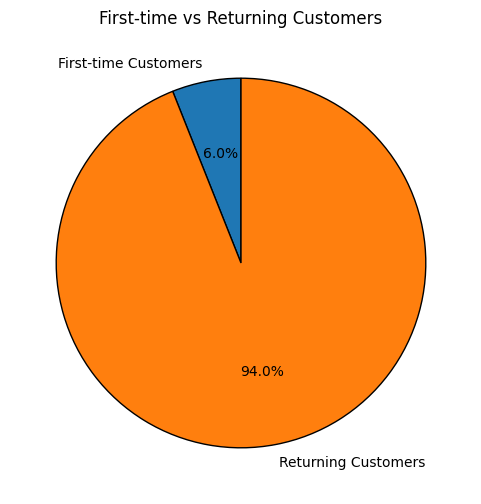

In [14]:
first_purchase_ratio = df_orders["first_purchase"].mean() * 100
labels = ["First-time Customers", "Returning Customers"]
sizes = [first_purchase_ratio, 100 - first_purchase_ratio]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("First-time vs Returning Customers")
plt.show()

재구매 고객이 압도적으로 많으므로 이들의 충성도를 강화하는 것이 핵심  
단, 신규 유입이 적은 것은 장기적 관점에서 충성 고객층이 줄어들 가능성 내포  
**시장 지배적 위치인지 확인 필요**. 그렇지 않다면 첫 구매 유도 마케팅도 강화할 필요가 있음

In [15]:
# CSV 파일 읽기
df_comp = pd.read_csv("/content/drive/My Drive/GoogleTrends_Timeline.csv")

In [16]:
print(df_comp.columns)
df_comp.head()

df_comp["Date"] = pd.to_datetime(df_comp["Date"])  # 날짜 형식 변환
df_comp = df_comp[df_comp["Date"].between("2017-05-17", "2017-08-15")]

print(df_comp["Date"].max())
print(df_comp["Date"].min())

Index(['Date', 'Instacart', 'Amazon Fresh', 'Walmart Grocery'], dtype='object')
2017-08-13 00:00:00
2017-05-21 00:00:00


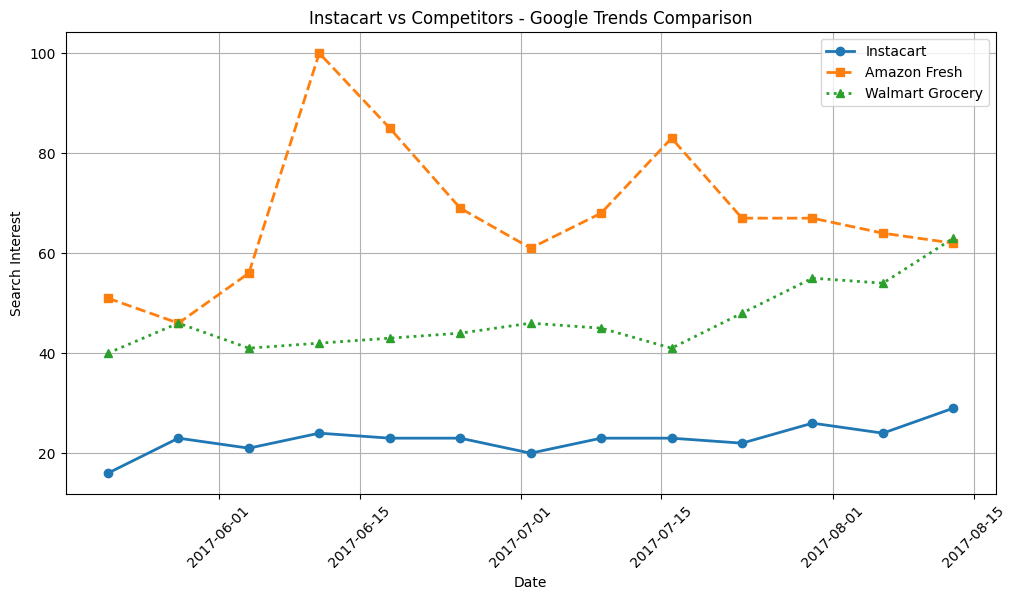

In [17]:
# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Instacart vs 경쟁사 검색 트렌드 시각화
plt.plot(df_comp["Date"], df_comp["Instacart"], marker="o", linestyle="-", label="Instacart", linewidth=2)
plt.plot(df_comp["Date"], df_comp["Amazon Fresh"], marker="s", linestyle="--", label="Amazon Fresh", linewidth=2)
plt.plot(df_comp["Date"], df_comp["Walmart Grocery"], marker="^", linestyle=":", label="Walmart Grocery", linewidth=2)

# 그래프 제목 및 라벨 설정
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.title("Instacart vs Competitors - Google Trends Comparison")
plt.legend()
plt.grid(True)

# 그래프 표시
plt.xticks(rotation=45)
plt.show()


자료 제공 시점(2017년 5월 ~ 동년 8월)에는 경쟁사 대비 낮은 검색량으로 시장의 지배자라고 보기는 어려움.  
 그러므로 신규 유입을 위한 전략도 필요하다고 짐작할 수 있음.

##첫 구매 고객의 인기 제품 분석  
👉 신규 고객이 처음 구매하는 제품을 분석하여, 첫 구매 유도를 최적화  

🔹 분석 방법  
order_products__prior.csv의 reordered == 0 데이터를 필터링  
첫 구매에서 가장 많이 구매한 제품 확인  
이 제품들을 신규 고객 할인 프로모션에 포함

   product_id  first_purchase_count            product_name
0       24852                 73956                  Banana
1       13176                 63537  Bag of Organic Bananas
2       21137                 58838    Organic Strawberries
3       21903                 55037    Organic Baby Spinach
4       47626                 46402             Large Lemon


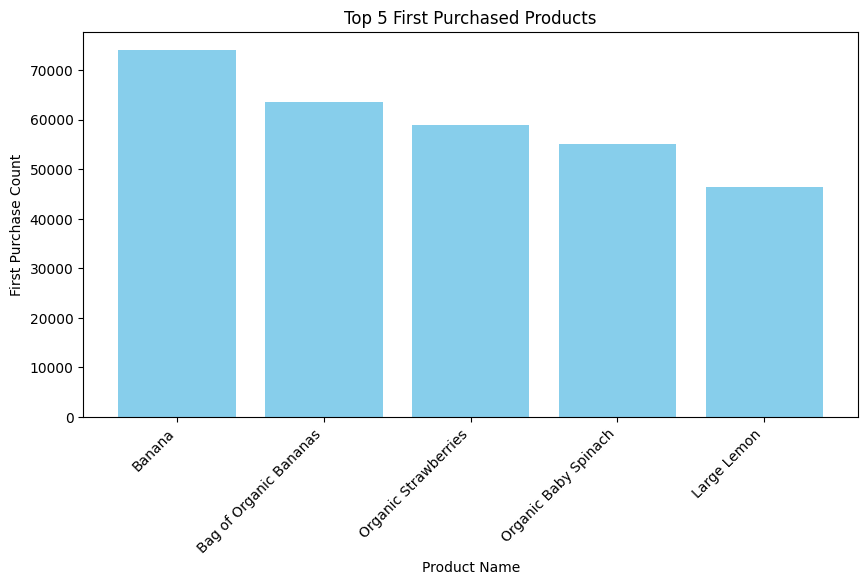

In [18]:
# 첫 구매 제품 필터링 (reordered == 0)
first_purchase_products = df_prior[df_prior["reordered"] == 0]["product_id"].value_counts().reset_index()
first_purchase_products.columns = ["product_id", "first_purchase_count"]

# 제품명 추가 (df_products 활용)
top_5_products = first_purchase_products.head(5).merge(df[["product_id", "product_name"]], on="product_id", how="left")

# 데이터프레임 확인 (상위 5개)
print(top_5_products)

# X축을 제품명으로 변경하여 가독성 개선
plt.figure(figsize=(10, 5))
plt.bar(top_5_products["product_name"], top_5_products["first_purchase_count"], color='skyblue')

# 라벨 & 제목 추가
plt.xlabel("Product Name")
plt.ylabel("First Purchase Count")
plt.title("Top 5 First Purchased Products")

# X축 라벨 회전 (겹치지 않도록)
plt.xticks(rotation=45, ha="right")

# 그래프 출력
plt.show()

  해당 제품을 신규 고객 할인 제품으로 선정하여 **첫 구매 전환율**(잠재 고객 중에서 실제 구매자로 전환된 비율) 증가시키는 방향 고려

##신규 고객의 재구매율 분석
👉 신규 고객이 재구매로 전환되는 비율을 분석하여, 전환 전략 강화

🔹 분석 방법
df_orders에서 첫 주문(order_number == 1)인 고객을 찾기  
df_orders에서 해당 고객들의 모든 주문(user_id)을 가져오기  
df_prior와 df_orders를 merge하여 고객의 주문 내역을 user_id 기준으로 확인  
신규 고객이 이후에 다시 주문했는지(reordered == 1 비율 계산)

신규 고객의 평균 재구매율: 58.97%


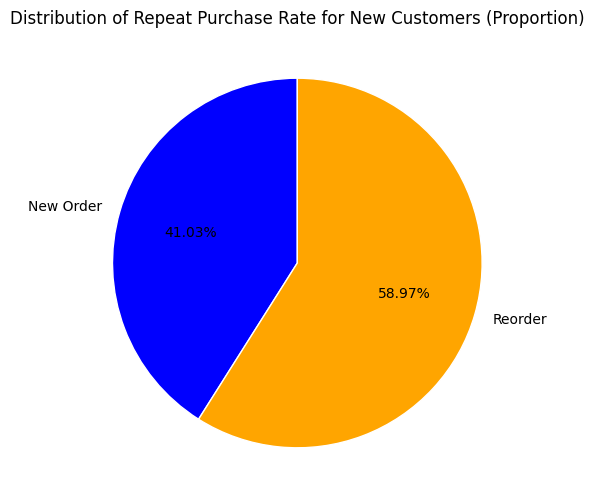

In [19]:
# 1️⃣ 신규 고객 찾기 (첫 주문만 한 고객)
first_order_users = df_orders[df_orders['order_number'] == 1]['user_id'].unique()

# 2️⃣ 신규 고객의 주문 데이터 가져오기 (df_orders에서 user_id 기준으로 필터)
new_user_orders = df_orders[df_orders['user_id'].isin(first_order_users)]

# 3️⃣ df_prior와 df_orders를 order_id 기준으로 merge (user_id 추가)
df_prior_merged = df_prior.merge(new_user_orders[['order_id', 'user_id']], on='order_id', how='left')

# 4️⃣ 신규 고객이 첫 주문 이후 다시 구매한 비율 (reordered == 1)
reorder_rate = df_prior_merged['reordered'].mean()

print(f"신규 고객의 평균 재구매율: {reorder_rate:.2%}")

# 신규 고객의 재구매율 계산
reorder_counts = df_prior_merged.groupby("reordered")["order_id"].count()
reorder_rate_values = reorder_counts / reorder_counts.sum()

# 원형 차트 그리기 (비율 표시)
plt.figure(figsize=(6, 6))
labels = ["New Order", "Reorder"]
colors = ["blue", "orange"]

plt.pie(reorder_rate_values, labels=labels, autopct="%1.2f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "white"})

plt.title("Distribution of Repeat Purchase Rate for New Customers (Proportion)")
plt.show()